
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

sex: 1 for female and 2 for male.

age: of the patient.

classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.

pneumonia: whether the patient already have air sacs inflammation or not.

pregnancy: whether the patient is pregnant or not.

diabetes: whether the patient has diabetes or not.

copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.

asthma: whether the patient has asthma or not.

inmsupr: whether the patient is immunosuppressed or not.

hypertension: whether the patient has hypertension or not.

cardiovascular: whether the patient has heart or blood vessels related disease.

renal chronic: whether the patient has chronic renal disease or not.

other disease: whether the patient has other disease or not.

obesity: whether the patient is obese or not.

tobacco: whether the patient is a tobacco user.

usmr: Indicates whether the patient treated medical units of the first, second or third level.

medical unit: type of institution of the National Health System that provided the care.

intubed: whether the patient was connected to the ventilator.

icu: Indicates whether the patient had been admitted to an Intensive Care Unit.

date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Covid Data.csv')

In [3]:
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [11]:
df.dtypes

USMER                     int64
MEDICAL_UNIT              int64
SEX                       int64
PATIENT_TYPE              int64
DATE_DIED                object
INTUBED                 float64
PNEUMONIA               float64
AGE                     float64
PREGNANT                float64
DIABETES                  int64
COPD                      int64
ASTHMA                    int64
INMSUPR                   int64
HIPERTENSION              int64
OTHER_DISEASE             int64
CARDIOVASCULAR            int64
OBESITY                   int64
RENAL_CHRONIC             int64
TOBACCO                   int64
CLASIFFICATION_FINAL      int64
ICU                     float64
dtype: object

>1.What is the average age of the patients?

In [11]:
df['AGE'].mean()

41.794102472403026

>2.What is the maximum and minimum age in the dataset?

Minumum

In [12]:
df.AGE.min()

0

Maximum 

In [13]:
df.AGE.max()

121

>3.How many unique patients are there in the dataset?

In [23]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [2]:
df.head(10)

NameError: name 'df' is not defined

>5.What are the top three pre-existing conditions among the patients?

In [25]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [17]:
condition = ['PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']

In [18]:
count = []
condi = []
for i in condition:
    count.append(df[i].sum())
    condi.append(i)


In [19]:
df1 = pd.DataFrame(count,columns=['count'])
df1['Condition'] = condi

In [20]:
df1

,count,Condition
0,3509403,PNEUMONIA
1,52182948,PREGNANT
2,2292609,DIABETES
3,2370376,COPD
4,2351562,ASTHMA
5,2409764,INMSUPR
6,2232405,HIPERTENSION
7,2553430,OTHER_DISEASE
8,2371677,CARDIOVASCULAR
9,2228406,OBESITY


In [21]:
df1.sort_values('count').head(3)

,count,Condition
9,2228406,OBESITY
6,2232405,HIPERTENSION
2,2292609,DIABETES


>6.How many patients have missing values for the "usmr" column?

In [5]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [13]:
a = df.USMER.isna().sum()
print(f"There is '{a}' missing values")

There is '0' missing values


In [9]:
df.isna().any()

USMER                   False
MEDICAL_UNIT            False
SEX                     False
PATIENT_TYPE            False
DATE_DIED               False
INTUBED                 False
PNEUMONIA               False
AGE                     False
PREGNANT                False
DIABETES                False
COPD                    False
ASTHMA                  False
INMSUPR                 False
HIPERTENSION            False
OTHER_DISEASE           False
CARDIOVASCULAR          False
OBESITY                 False
RENAL_CHRONIC           False
TOBACCO                 False
CLASIFFICATION_FINAL    False
ICU                     False
dtype: bool

>7.Can we visualize the correlation between different pre-existing conditions using a heatmap?

In [29]:
b= df.corr()
b

C:\Users\mnkv1\AppData\Local\Temp\ipykernel_8524\1411377672.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  b= df.corr()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,1.000000,0.127927,-0.001126,-0.190570,0.175457,-0.154950,-0.045088,-0.001469,0.014704,0.011030,0.010814,0.003234,0.014830,-0.015763,0.010097,0.014567,0.011527,0.010638,0.028840,0.174901
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,0.205243,-0.046433,-0.082223,0.005300,0.019523,0.014209,0.013312,0.011785,0.020964,0.027453,0.014406,0.019577,0.014751,0.012282,0.079981,0.205141
SEX,-0.001126,0.001475,1.000000,0.089505,-0.089943,-0.012131,0.028367,0.992713,0.008888,0.009372,0.010415,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.057782,-0.089844
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,-0.976335,0.022966,0.315193,0.088340,0.008743,0.019548,0.023042,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.183370,-0.975810
INTUBED,0.175457,0.205243,-0.089943,-0.976335,1.000000,0.079743,-0.317945,-0.088097,-0.009215,-0.020124,-0.023446,-0.024140,-0.007628,-0.035404,-0.022442,-0.020217,-0.019309,-0.022428,0.193075,0.999434
PNEUMONIA,-0.154950,-0.046433,-0.012131,0.022966,0.079743,1.000000,-0.073127,-0.007284,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325,0.075351,0.079691
AGE,-0.045088,-0.082223,0.028367,0.315193,-0.317945,-0.073127,1.000000,0.027257,0.004422,0.019048,0.022715,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.152637,-0.317813
PREGNANT,-0.001469,0.005300,0.992713,0.088340,-0.088097,-0.007284,0.027257,1.000000,0.014707,0.015736,0.016765,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794,-0.057809,-0.087991
DIABETES,0.014704,0.019523,0.008888,0.008743,-0.009215,-0.004484,0.004422,0.014707,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.004739,-0.009223
COPD,0.011030,0.014209,0.009372,0.019548,-0.020124,-0.005618,0.019048,0.015736,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.010336,-0.020146


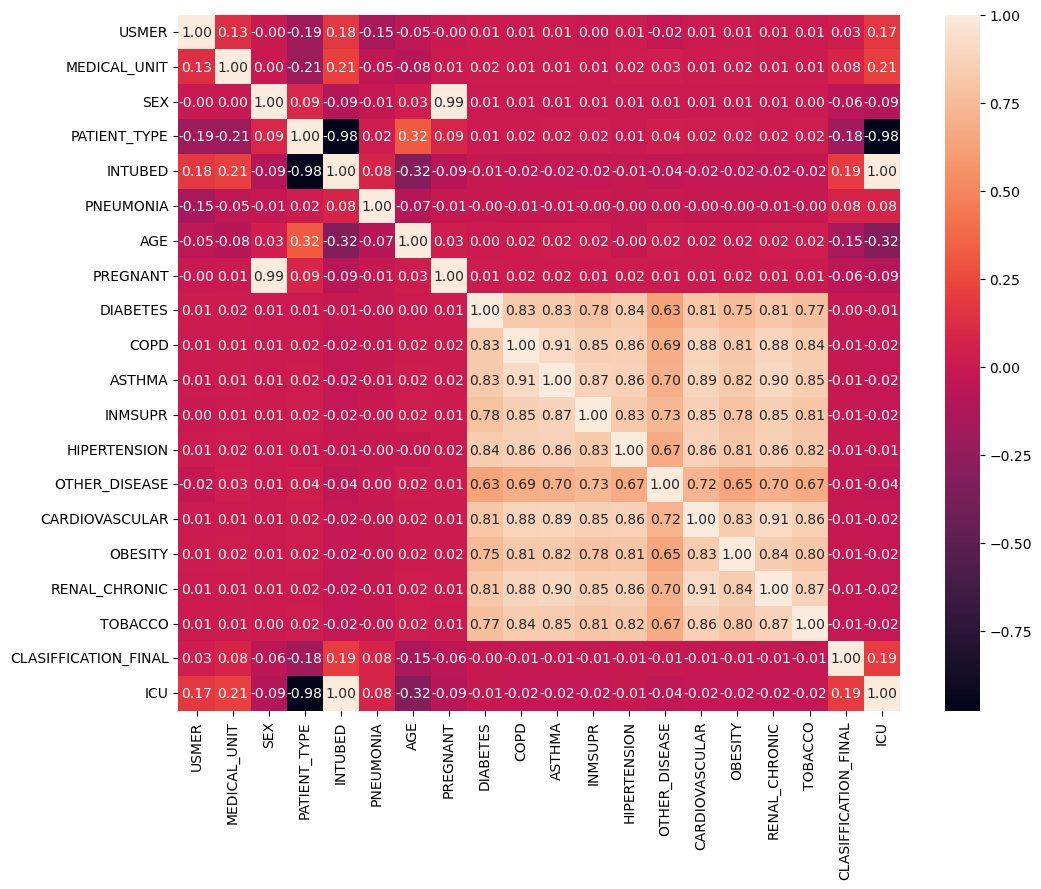

In [44]:
plt.figure(figsize=(11,9))
sns.heatmap(b, annot=True,fmt='.2f')
plt.tight_layout()

In [46]:
visu = df.corr()
visu

C:\Users\mnkv1\AppData\Local\Temp\ipykernel_8524\950621336.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  visu = df.corr()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,1.000000,0.127927,-0.001126,-0.190570,0.175457,-0.154950,-0.045088,-0.001469,0.014704,0.011030,0.010814,0.003234,0.014830,-0.015763,0.010097,0.014567,0.011527,0.010638,0.028840,0.174901
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,0.205243,-0.046433,-0.082223,0.005300,0.019523,0.014209,0.013312,0.011785,0.020964,0.027453,0.014406,0.019577,0.014751,0.012282,0.079981,0.205141
SEX,-0.001126,0.001475,1.000000,0.089505,-0.089943,-0.012131,0.028367,0.992713,0.008888,0.009372,0.010415,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.057782,-0.089844
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,-0.976335,0.022966,0.315193,0.088340,0.008743,0.019548,0.023042,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.183370,-0.975810
INTUBED,0.175457,0.205243,-0.089943,-0.976335,1.000000,0.079743,-0.317945,-0.088097,-0.009215,-0.020124,-0.023446,-0.024140,-0.007628,-0.035404,-0.022442,-0.020217,-0.019309,-0.022428,0.193075,0.999434
PNEUMONIA,-0.154950,-0.046433,-0.012131,0.022966,0.079743,1.000000,-0.073127,-0.007284,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325,0.075351,0.079691
AGE,-0.045088,-0.082223,0.028367,0.315193,-0.317945,-0.073127,1.000000,0.027257,0.004422,0.019048,0.022715,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.152637,-0.317813
PREGNANT,-0.001469,0.005300,0.992713,0.088340,-0.088097,-0.007284,0.027257,1.000000,0.014707,0.015736,0.016765,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794,-0.057809,-0.087991
DIABETES,0.014704,0.019523,0.008888,0.008743,-0.009215,-0.004484,0.004422,0.014707,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.004739,-0.009223
COPD,0.011030,0.014209,0.009372,0.019548,-0.020124,-0.005618,0.019048,0.015736,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.010336,-0.020146


<Axes: >

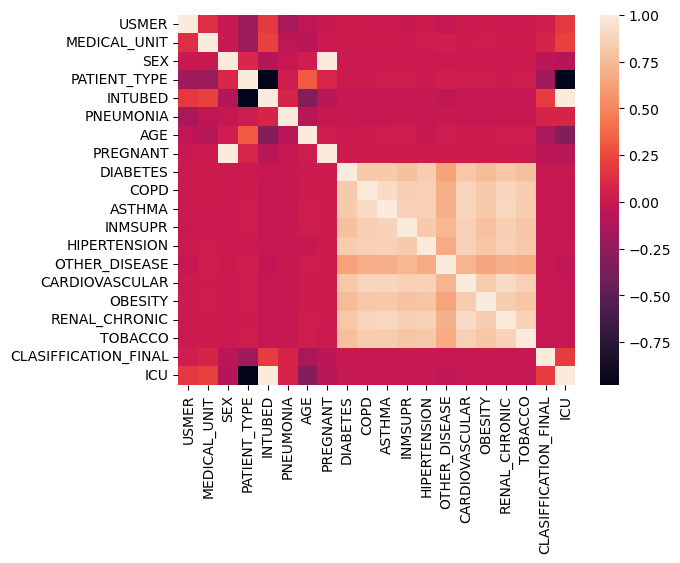

In [47]:
sns.heatmap(visu)

In [48]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


>9. What is the distribution of ages among different outcomes (recovered, died)?

In [9]:
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [10]:
def date(x):
    if x == '9999-99-99':
        return 1
    else:
        return 0

In [11]:
df['New'] = df['DATE_DIED'].apply(date)

In [12]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,New
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,0
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,0
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,7,97,1
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,1,2,2,2,2,2,7,2,1
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,7,97,1
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,7,97,1


<Axes: xlabel='New', ylabel='AGE'>

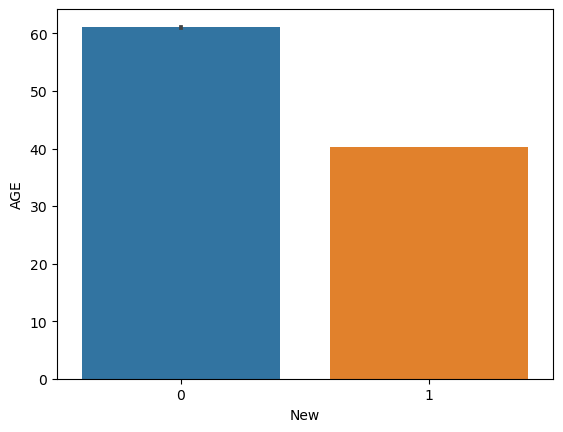

In [19]:
sns.barplot(x = df['New'], y = df['AGE'])

In [17]:
df['AGE'].unique()

array([ 65,  72,  55,  53,  68,  40,  64,  37,  25,  38,  24,  30,  48,
        23,  80,  61,  54,  59,  45,  26,  32,  49,  39,  27,  57,  20,
        56,  47,  50,  46,  43,  28,  33,  16,  62,  58,  36,  44,  66,
        52,  51,  35,  19,  90,  34,  22,  29,  14,  31,  42,  15,   1,
         0,  17,  41,   2,  10,  12,  13,   4,   7,   6,   8,  60,   5,
        63,  75,  81,  67,  18,  70,  88,  85,  92,  73,  74,  78,  76,
        82,  77,  86,  71,  95,  87,  83,  84,  79,  69,  89,   3,  97,
        93, 100,  91,  21, 103,  11,   9,  94,  96, 101, 107, 102,  98,
        99, 109, 119, 116, 105, 104, 111, 114, 120, 106, 108, 110, 118,
       117, 121, 115, 113], dtype=int64)

>10.Can we create a bar chart to show the count of patients in each medical unit?

<Axes: >

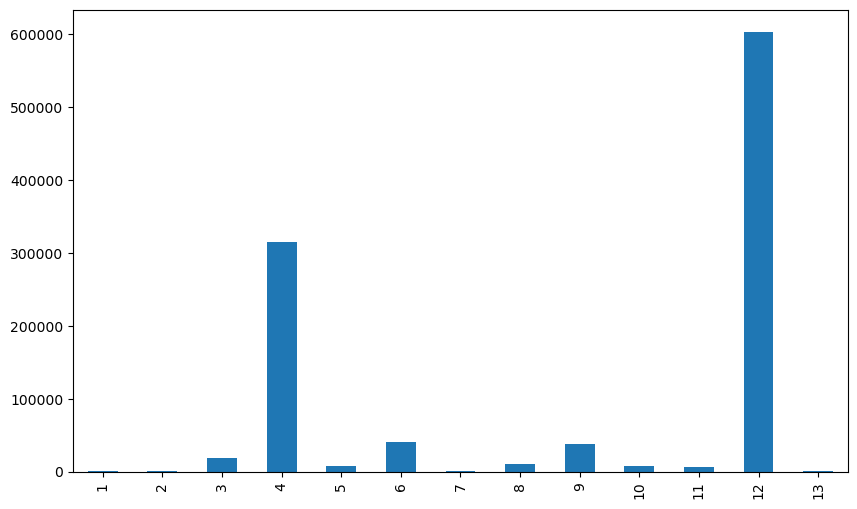

In [24]:
med = df['MEDICAL_UNIT'].value_counts()
plt.figure(figsize=(10, 6))
med.sort_index().plot(kind='bar')


>11.How does the distribution of ages vary between male and female patients?

In [129]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [130]:
df['SEX'] = df['SEX'].map({1: 'Female', 2: 'Male'})

In [131]:
df.SEX.unique()

array(['Female', 'Male'], dtype=object)

In [132]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,Female,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,Male,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,Male,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,Female,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,Male,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


Text(0, 0.5, 'Age')

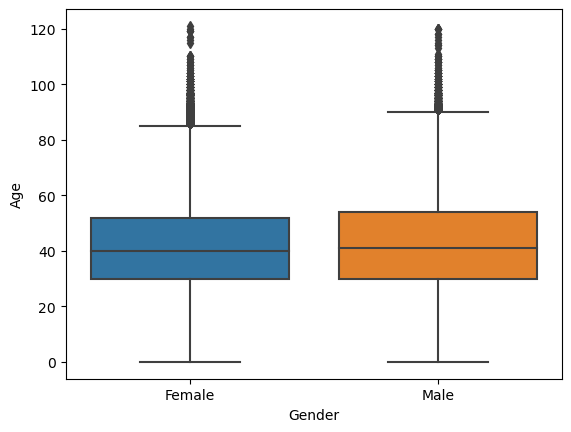

In [133]:
# plt.figure(figsize=(12, 8))
sns.boxplot(x='SEX', y='AGE', data=df)
plt.xlabel('Gender')
plt.ylabel('Age')

>12.Can we visualize the percentage of smokers among the patients?


In [9]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,Female,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,Male,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,Male,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,Female,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,Male,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [102]:
df.TOBACCO.unique()

array([2., 1.])

In [103]:
df.replace(98, np.nan, inplace=True)
df.TOBACCO.unique()

array([2., 1.])

In [104]:
df.dropna(inplace=True)

In [105]:
df['TOBACCO'] = df['TOBACCO'].astype(np.int64)

In [106]:
df.TOBACCO.unique()

array([2, 1], dtype=int64)

In [107]:
df['TOBACCO'] = df['TOBACCO'].map({1: 'Smoker', 2: 'Non Smoker'})

In [118]:
perc = df['TOBACCO'].value_counts(normalize=True) * 100

In [119]:
perc

Non Smoker    95.833508
Smoker         4.166492
Name: TOBACCO, dtype: float64

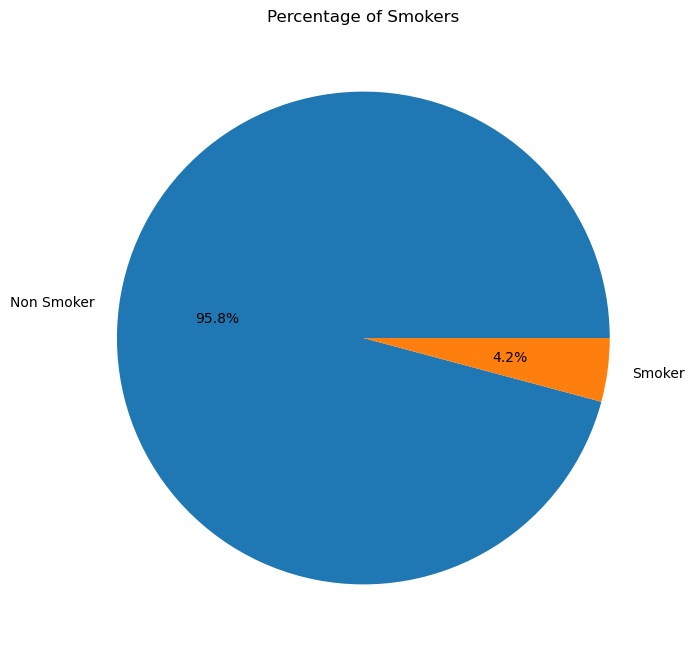

Non Smoker    95.833508
Smoker         4.166492
Name: TOBACCO, dtype: float64


In [124]:
plt.figure(figsize=(8,8))
plt.pie(perc, autopct='%1.1f%%', labels=perc.index)
plt.title('Percentage of Smokers')
plt.show()
print(perc)

>13.What is the average age of patients with and without diabetes?

In [78]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
153,1,2,1,2,2020-08-05,1.0,2.0,0.0,Non Pregnant,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2
330,1,3,1,2,2020-07-03,1.0,2.0,64.0,Non Pregnant,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,7,1
334,2,3,1,2,2020-03-27,2.0,2.0,49.0,Non Pregnant,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,5,2
335,1,3,1,2,2020-03-27,2.0,2.0,88.0,Non Pregnant,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,7,2
339,1,3,1,2,2020-05-04,1.0,2.0,53.0,Non Pregnant,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2


In [79]:
df['DIABETES'] = df['DIABETES'].astype(np.int64)

In [80]:
df['DIABETES'] = df['DIABETES'].map({1: 'Diabetes Patient', 2: 'Without Diabetes'})

In [81]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
153,1,2,1,2,2020-08-05,1.0,2.0,0.0,Non Pregnant,Without Diabetes,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2
330,1,3,1,2,2020-07-03,1.0,2.0,64.0,Non Pregnant,Without Diabetes,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,7,1
334,2,3,1,2,2020-03-27,2.0,2.0,49.0,Non Pregnant,Without Diabetes,...,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,5,2
335,1,3,1,2,2020-03-27,2.0,2.0,88.0,Non Pregnant,Diabetes Patient,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,7,2
339,1,3,1,2,2020-05-04,1.0,2.0,53.0,Non Pregnant,Without Diabetes,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2


In [68]:
df.groupby('DIABETES')['AGE'].mean()       

DIABETES
Diabetes Patient    56.944807
Without Diabetes    39.697523
Name: AGE, dtype: float64

>14.How does the distribution of ages differ between ICU-admitted and non-ICU-admitted patients?


In [3]:
df['ICU'].unique()

array([97,  2,  1, 99], dtype=int64)

In [5]:
df.replace({97: np.nan, 99: np.nan}, inplace= True)

In [8]:
df.dropna(inplace=True)

In [12]:
df['ICU'].unique()

array([2, 1], dtype=int64)

In [11]:
df['ICU'] = df['ICU'].astype(np.int64)

In [14]:
df['ICU'] = df['ICU'].map({1: 'ICU Admitted', 2: 'NON ICU Admitted'})

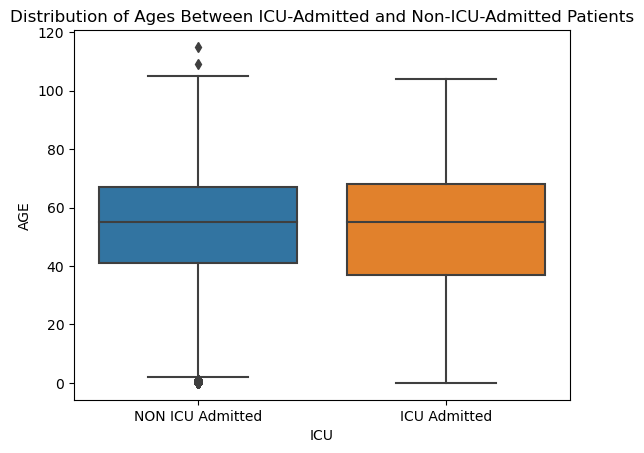

In [19]:
# plt.figure(figsize=(12, 8))
sns.boxplot(x='ICU', y='AGE', data= df)
plt.title("Distribution of Ages Between ICU-Admitted and Non-ICU-Admitted Patients")
plt.show()

>15.Can we visualize the trend of COVID cases over time (if time information is available)?


In [35]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [28]:
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [38]:
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')

C:\Users\mnkv1\AppData\Local\Temp\ipykernel_3912\3211745720.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')


In [39]:
df.head(20)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,2020-03-05,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,2020-03-06,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,2020-09-06,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,2020-12-06,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,2020-06-21,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,NaT,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,NaT,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,NaT,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,NaT,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,NaT,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [41]:
date = df.groupby('DATE_DIED').size()

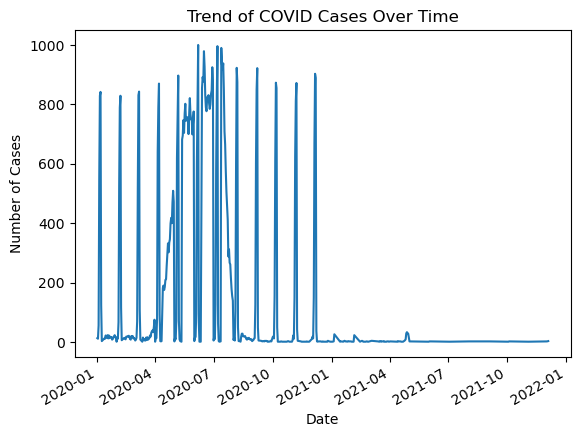

In [57]:
# plt.figure(figsize=(12, 8))
date.plot(kind='line')
plt.title('COVID Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()


>16.Is there a difference in age distribution between pregnant and non-pregnant patients?


In [134]:
df['PREGNANT'].unique()

array([ 2, 97, 98,  1], dtype=int64)

In [135]:
df.replace({97: np.nan, 98: np.nan}, inplace= True)

In [136]:
df['PREGNANT'].unique()

array([ 2., nan,  1.])

In [137]:
df.dropna(inplace=True)

In [138]:
df['PREGNANT'] = df['PREGNANT'].astype(np.int64)

In [139]:
df['PREGNANT'] = df['PREGNANT'].map({1: 'Pregnant', 2: 'Non Pregnant'})

<Axes: xlabel='PREGNANT', ylabel='AGE'>

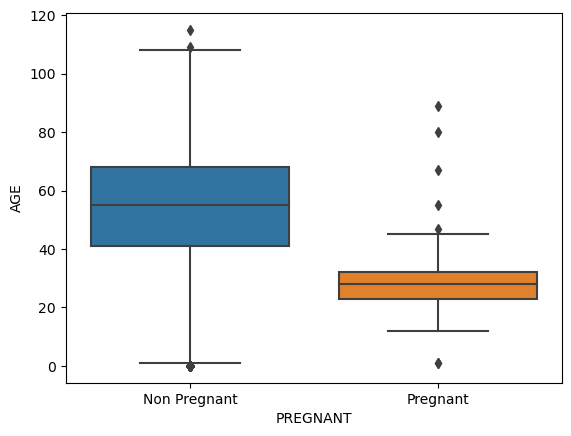

In [141]:
# plt.figure(figsize=(12, 8))
sns.boxplot(x='PREGNANT', y='AGE', data=df)

>17.How does the distribution of ages vary between different outcomes (recovered, died) for diabetic patients?

In [85]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
153,1,2,1,2,2020-08-05,1.0,2.0,0.0,Non Pregnant,Without Diabetes,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2
330,1,3,1,2,2020-07-03,1.0,2.0,64.0,Non Pregnant,Without Diabetes,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,7,1
334,2,3,1,2,2020-03-27,2.0,2.0,49.0,Non Pregnant,Without Diabetes,...,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,5,2
335,1,3,1,2,2020-03-27,2.0,2.0,88.0,Non Pregnant,Diabetes Patient,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,7,2
339,1,3,1,2,2020-05-04,1.0,2.0,53.0,Non Pregnant,Without Diabetes,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2


In [88]:
patients = df[df['DIABETES'] == 'Diabetes Patient']

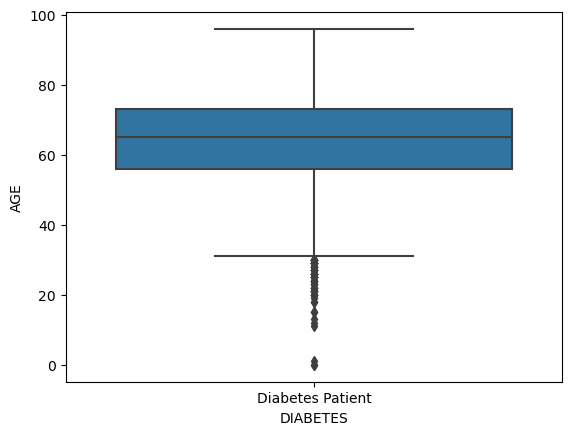

In [92]:
sns.boxplot(x='DIABETES', y='AGE', data= patients)
plt.show()